# Convolutional Neural Networks (CNN)

* In this tutorial we will introduce CNNs. 
* We will exclusively deal with image classification, but the techniques and concepts discussed in this tutorial very well carry forward to other image tasks like detection and generation.

## Multilayer Perceptron Network

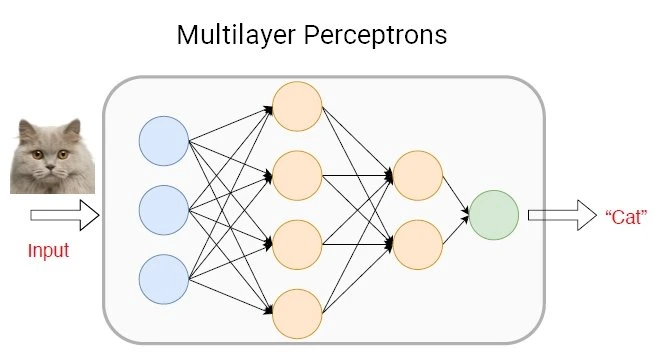


[Source](https://viso.ai/deep-learning/deep-neural-network-three-popular-types/)

## Why CNNs? Why not stick with MLP networks?

<details>
  <summary></summary>
   <ul>
  <li> Each pixel in the input will require an input neuron. The network very quickly becomes too big to handle.</li>
  <li> The input to a MLP has to be a flattened image, which results in loss of spatial information.</li>
  <li> More reasons</li>
</ul> 
</details>

## CNN architecture

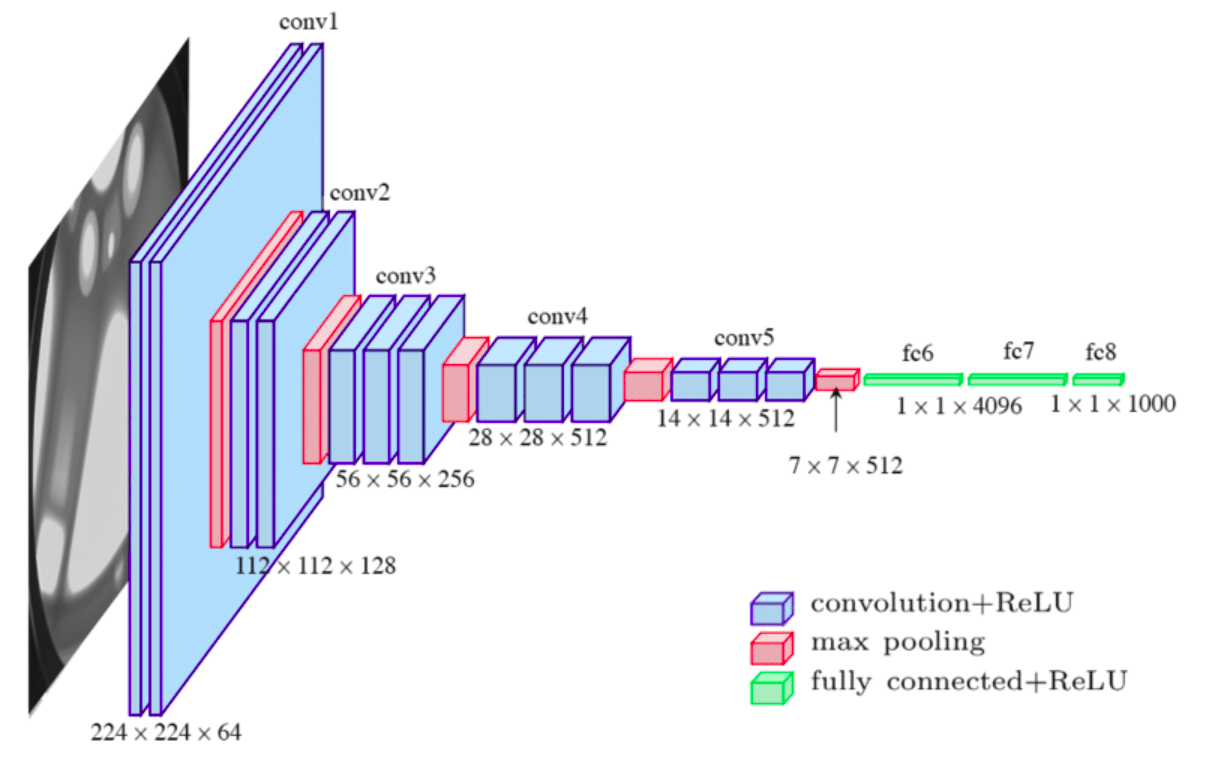

[Source](https://vitalflux.com/different-types-of-cnn-architectures-explained-examples/)


## Convolutions

Mathematical definition: Convolution is a mathematical operation on two functions (f and g) that produces a third function (f ∗ g) that expresses how the shape of one is modified by the other. [Wikipedia](https://en.wikipedia.org/wiki/Convolution)

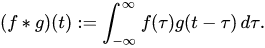

In deep learning, convulution is a simple operation of convolving a matrix/tensor on another matrix/tensor 
![ChessUrl](https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/conv-full-layer.gif "chess")

[Source](https://analyticsindiamag.com/convolutional-neural-network-image-classification-overview/)


Some nomenclature:

* The matrix/tensor with which we are convolving is called as the **kernal** or **filter**. In a typical neural network you will have multiple convolutional layers, with each layer having more than one kernels/filters

* The output after the convlution operation is called as the **feature vector** or **features**

## Pooling layers

Pooling layers downsample the feature vector.
![ChessUrl](https://miro.medium.com/v2/resize:fit:720/1*fXxDBsJ96FKEtMOa9vNgjA.gif "chess")

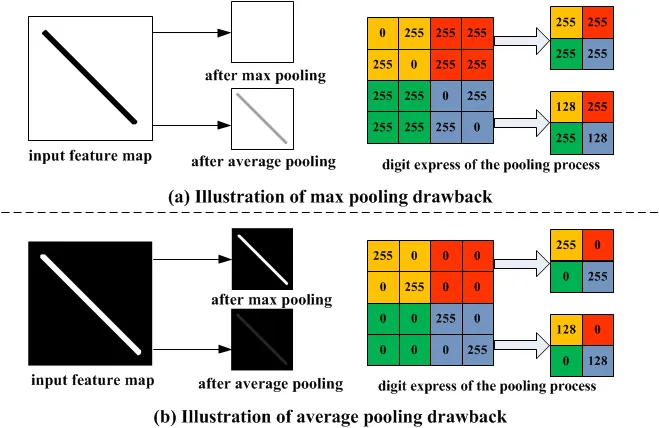


[Source](https://pub.towardsai.net/introduction-to-pooling-layers-in-cnn-dafe61eabe34)

## Exercises



*   Write a function *SimpleConv* that will take two matrices named "image" and "kernel" of  shape (10,10) and (3,3) respectively. Convolve the kernel on the image and return the output.
*   Write a function *SimplePool* that will take a matrix of shape (8,8) and the type of pooling operation as input. Apply the corresponding pooling operation on the matrix and return the result.
* Write a function *SimpleConv_Pool* that will take two matrices named "image" and "kernel" of  shape (10,10) and (3,3) respectively and a type of pooling operation as input. Convolve the kernel on the image and return the output after doing the corresponding pooling operation. Use *SimpleConv* and *SimplePool*.



In [ ]:
import numpy as np
np.random.seed(0)

In [ ]:
kernel = np.array([[1,2],[2,1]])
image = np.array([[55,52],[57,50]])
print(ke)

In [ ]:
print("Image")
print(image)
print("kernel")
print(kernel)


Image
[[4 0 3 3 3 1 3 2 4 0]
 [0 4 2 1 0 1 1 0 1 4]
 [3 0 3 0 2 3 0 1 3 3]
 [3 0 1 1 1 0 2 4 3 3]
 [2 4 2 0 0 4 0 4 1 4]
 [1 2 2 0 1 1 1 1 3 3]
 [2 3 0 3 4 1 2 4 3 4]
 [4 4 3 4 4 4 0 4 3 2]
 [0 1 1 3 0 0 1 2 4 2]
 [0 3 2 2 0 1 0 2 2 3]]
kernel
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
# Write your code here

def SimpleConv(image,kernel):
  nrows,ncols = image.shape
  knrows,kncols = kernel.shape
  conv_out = np.zeros((nrows - knrows + 1,nrows - knrows + 1))

  for i in range(1,nrows-1):
    for j in range(1,ncols-1):
      conv_out[i-1][j-1] = np.sum(image[i-1:i+2,j-1:j+2] * kernel) # Try generalising this more
  return conv_out


In [ ]:
conv_out = SimpleConv(image,kernel)
print(conv_out)
print(conv_out.shape)

[[11.  2.  6.  6.  4.  3.  6.  6.]
 [ 1.  8.  3.  3.  5.  5.  5.  6.]
 [ 5.  1.  4.  5.  2.  9.  5.  8.]
 [ 9.  2.  2.  2.  6.  1.  9.  8.]
 [ 4.  9.  6.  2.  3.  9.  4. 11.]
 [ 7.  6.  9.  8.  2.  7.  8.  6.]
 [ 7.  9.  4.  7.  9.  3. 10.  9.]
 [ 7.  7.  6.  5.  4.  7.  4. 11.]]
(8, 8)


In [ ]:
# Write your code here

def SimplePool(image,pool_type):
  nrows,ncols = image.shape
  knrows,kncols = kernel.shape
  pool_out = np.zeros((nrows//2,ncols//2))

  for i in range(0,nrows,2):
    for j in range(0,ncols,2):
      if(pool_type == 'avg_pool'):
        pool_out[i//2][j//2] = np.mean(image[i:i+2,j:j+2])
      if(pool_type == 'max_pool'):
        pool_out[i//2][j//2] = np.max(image[i:i+2,j:j+2])
  return pool_out

In [ ]:
print(SimplePool(conv_out,"avg_pool"))
print(SimplePool(conv_out,"max_pool"))

[[5.5  4.5  4.25 5.75]
 [4.25 3.25 4.5  7.5 ]
 [6.5  6.25 5.25 7.25]
 [7.5  5.5  5.75 8.5 ]]
[[11.  6.  5.  6.]
 [ 9.  5.  9.  9.]
 [ 9.  9.  9. 11.]
 [ 9.  7.  9. 11.]]


In [ ]:
# Write your code here

def SimpleConv_Pool(image,kernel):
  pass

## Main Inductive Biases
* Locality

 - Pixels that are located closely with each other are related to each other.
 - Ensured by: Kernel convlutions. The kernel looks in a local neighbourhood.


* Weight/Parameter sharing

  - Different parts/areas of an image have to be processed in the same way.
  - Cat appearing at top right or bottom left should still be classified as "cat"
  - Ensured by: *One* kernel Convolves the whole image.

* Pooling operation introduces **local translational invariance**

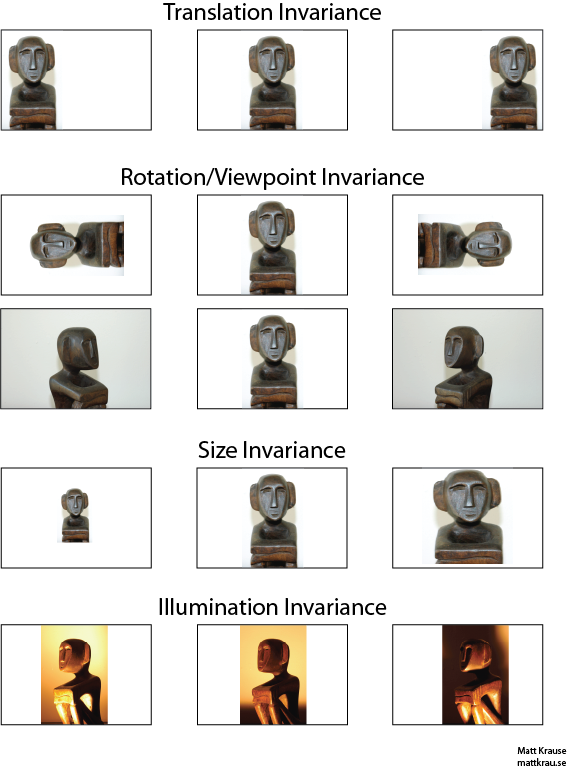


[Source](https://stats.stackexchange.com/a/208949)

[link text](https://)

## Padding and Stride  

* One of the constraints of convolution operation is that we have very limited control over the output shape. 
Assuming that the input shape $n_h\times n_w$ is and the convolution kernel shape is $k_h\times k_w$, the output shape will be $(n_h-k_h+1) \times (n_w-k_w+1)$ *

* Another is the loss of information near the boundaries of the original image. For example: If we start with a pixel image, layers of convolutions reduce the image to pixels, slicing off of the image and with it obliterating any interesting information on the boundaries of the original image. [Taken from D2L book]

### Padding

Add extra filler pixels around the original image. But what do we set the values of pixels to? 

* The obvious answer is to set the values to 0. In this case the image will be surronded by a black border.
* Any other ideas that might make more sense?

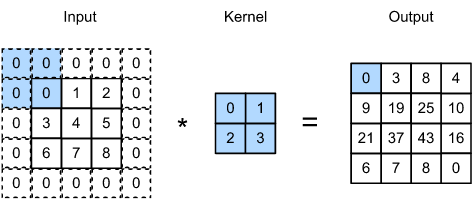

[Source](https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html)

Output shape after padding will be $(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1)$, where $p_h$ is the total rows of padding (half top and bottom) and  $p_w$ is the total columns of padding (half right and left).

### Stride

In all the previous examples we only slided the kernel by one unit. However, sometimes, we want to skip intermediate locations either for computational efficiency or because we wish to downsample, so we move our window more than one element at a time. The number of rows and columns traversed per slide as *stride*.

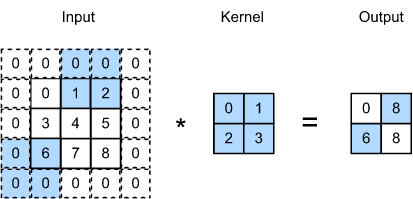

Width Stride: 2

Column Stride: 3


[Source](https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html)

Output shape with strides will be $\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor$, where $s_h$ is the stride for the height and $s_w$ is the stride for the width.

## Questions



*   Write a function that will take an (8,8) image as input and the number of padding rows and coloumns as input and returns the padded image.
*   Write a function that will take an (7,7) image, kernel, padding rows,padding columns,stride as input and return the output of the strided convolution operation on the padded image by using the kernal.

* Find the output dimension of every layer in the following CNN.



In [ ]:
image = np.random.randint(5,size = (7,7))
kernel = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [ ]:
# Write your code here
def pad_image_fn(image,pad_h = 2,pad_w = 2):
  n = image.shape[0]
  output_shape = (n+pad_h,n+pad_w)
  output = np.zeros((output_shape))
  i = pad_h//2
  j = pad_w//2
  output[i:n+i,j:n+j] = image 
  return output

In [ ]:
pad_image_fn(image,2,2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 3., 2., 1., 2., 3., 3., 0.],
       [0., 3., 2., 3., 4., 1., 2., 3., 0.],
       [0., 1., 2., 1., 4., 2., 3., 0., 0.],
       [0., 3., 2., 3., 0., 0., 0., 3., 0.],
       [0., 2., 3., 0., 4., 0., 0., 2., 0.],
       [0., 3., 2., 3., 0., 0., 0., 3., 0.],
       [0., 0., 2., 2., 0., 4., 3., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# Write your code here
def NotSoSimpleConv(image,kernel, stride = 1, pad_h = 2, pad_w = 2):
  pad_image = pad_image_fn(image,pad_h,pad_w)
  nrows,ncols = pad_image.shape
  n = image.shape[0]
  k = kernel.shape[0]
  p = pad_h//2
  q = pad_w//2
  output_shape = ((n-k+pad_h+stride)//stride ,(n-k+pad_w+stride)//stride)
  output = np.zeros(output_shape)

  for i in range(1,nrows,stride):
    for j in range(1,ncols,stride):
      output[(i-1)//stride,(j-1)//stride] = np.sum(pad_image[i-p:i+p+1,j-q:j+q+1]*kernel)
  return output



In [ ]:
NotSoSimpleConv(image,kernel,2,2,)

array([[4., 6., 4., 3.],
       [3., 3., 6., 2.],
       [4., 2., 0., 2.],
       [0., 4., 4., 4.]])

## Overall CNN workflow

**We have multiple kernels in each layer, each of these kernels try to learn some features and based on the concatnated feature vector from all the kernels we downsample them (optional). The next convulitional layer convolves on the previous layers feature vector/ downsampled feature vector.**


As we go deeper and deeper in the network you will notice that image/input dimension gets smaller and smaller, while the number of features increases. Finally we flatten the feature vector from the last convlutional layer and send it to 1-2 MLP layer network to do our classfication.

## Question

Define a CNN network for MNIST classification (image shape = [28,28]), with the following network design. You will have to find x before you can define the network. Also find the output dimension of every layer.

* Convolutional_layer1:
 - number_of_kernels = 16
 - kernel_size = 5,5
 - stride = 1
 - padding = 2

* Relu
* Maxpooling 
  - kernel_size = 2,2

* Convolutional_layer2:
 - number_of_kernels = 32
 - kernel_size = 5,5
 - stride = 1
 - padding = 2

* Relu
* Maxpooling 
  - kernel_size = 2,2

* Linear_layer1:
  - in_features = x
  - out_features = 10

Pytorch Functions that will be helpful:

* nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)


* nn.ReLU()



* nn.MaxPool2d(kernel_size)


* nn.Linear(in_features, out_features)

In [ ]:
#  Write your code here

import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()      
        # The input to the network is of shape (28,28,1)  
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)        # Fill 28 - 5 + 1 + 4 = 28
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=2)        # Fill              
        self.relu = nn.ReLU()
        self.max_pool = nn.MaxPool2d(kernel_size=2)                                            # Fill
        self.out = nn.Linear(1568,10)                                                                  # Fill
        
    def forward(self, x):

        x = self.conv1(x) #(28,28)
        x = self.relu(x)
        x = self.max_pool(x) #(14,14)

        x = self.conv2(x)     #(14-5+1+4)  
        x = self.relu(x)
        x = self.max_pool(x)   #(7,7)

        x = x.view(x.size(0), -1)     #()    32*7*7
        output = self.out(x)
        return output



In [ ]:
cnn = CNN()
cnn.to('cuda')

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
from torchsummary import summary
summary(cnn, (1,28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                   [-1, 10]          15,690
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.11
Estimated Total Size (MB): 0.44
----------------------------------------------------------------


# How do CNN see?

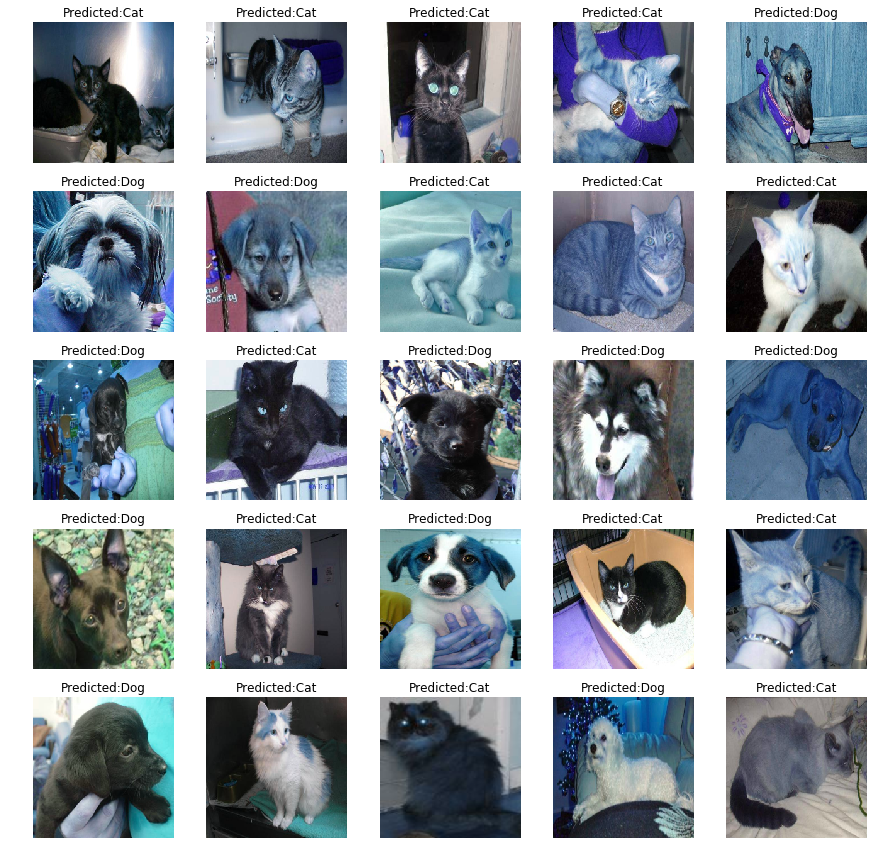

Informally we can try understand their vision in the bases of features present in images. For example in faces the higher-level features are eyes, noes, mouth and the lower-level featueres could be color, texture, edges.

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

In [ ]:
!wget https://static01.nyt.com/images/2019/06/17/science/17DOGS/17DOGS-superJumbo.jpg

--2023-02-28 09:33:36--  https://static01.nyt.com/images/2019/06/17/science/17DOGS/17DOGS-superJumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350990 (343K) [image/jpeg]
Saving to: ‘17DOGS-superJumbo.jpg’

17DOGS-superJumbo.j 100%[===================>] 342.76K  --.-KB/s    in 0.04s   

2023-02-28 09:33:36 (9.35 MB/s) - ‘17DOGS-superJumbo.jpg’ saved [350990/350990]



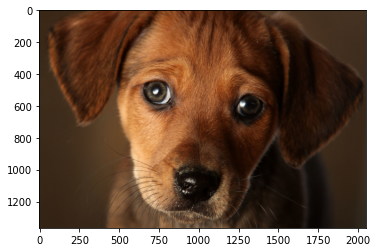

In [ ]:
image = Image.open('/content/17DOGS-superJumbo.jpg')
plt.imshow(image)

In [ ]:
model = models.resnet18(pretrained=True)
print(model)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []# get all the model children as list
model_children = list(model.children())#counter to keep count of the conv layers
counter = 0#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


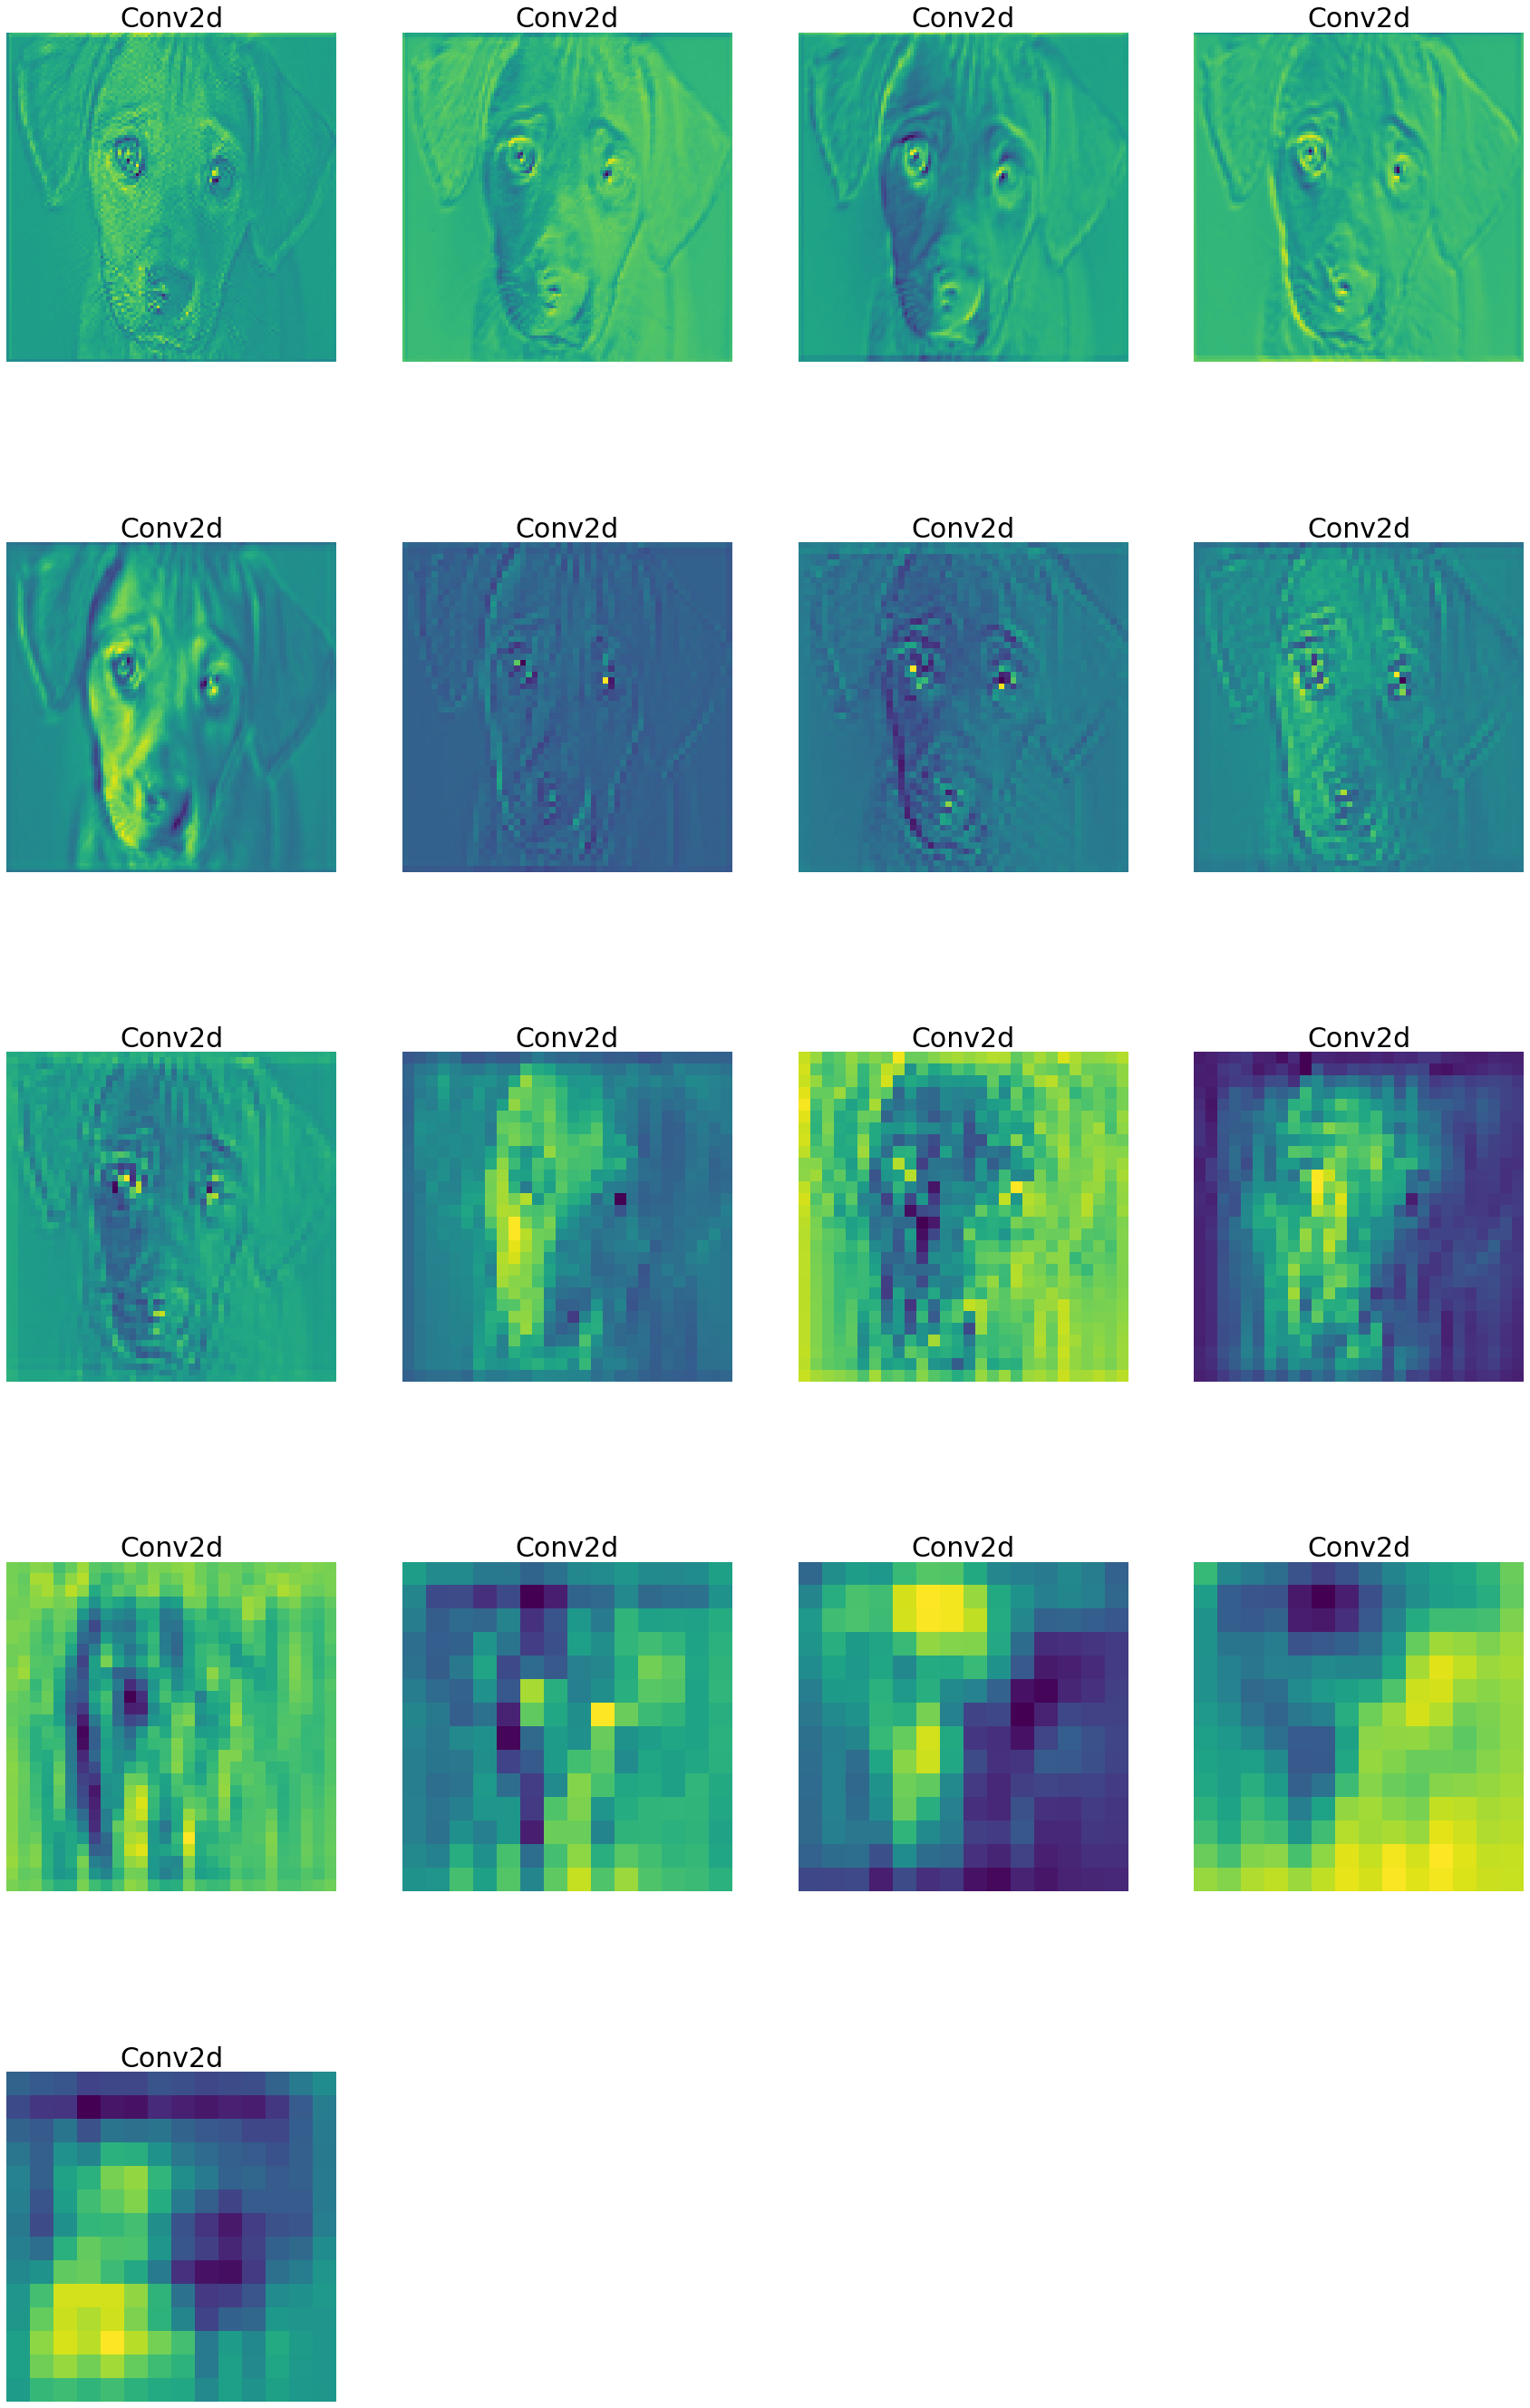

In [ ]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')